This notebook shows some examples of methods on a BandStructureSymmLine object (gettting band gaps, vbm, etc...) and basic plotting. Written by Geoffroy Hautier (geoffroy.hautier@uclouvain.be)

We start by querying the MP database for a band structure object. Please note that you could get such an object from a run (VASP, ABINIT, ...) using the methods in pymatgen.io


In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19
from __future__ import annotations

In [ ]:
from pymatgen.electronic_structure.core import Spin
from pymatgen.ext.matproj import MPRester

# This initializes the Rest connection to the Materials Project db. Put your own API key if needed.
mpr = MPRester()
# load the band structure from mp-3748, CuAlO2 from the MP db
bs = mpr.get_bandstructure_by_material_id("mp-3748")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

We print some information about the band structure

In [ ]:
# is the material a metal (i.e., the fermi level cross a band)
print(bs.is_metal())
# print information on the band gap
print(bs.get_band_gap())
# print the energy of the 20th band and 10th kpoint
print(bs.bands[Spin.up][20][10])
# print energy of direct band gap
print(bs.get_direct_band_gap())
# print information on the vbm
print(bs.get_vbm())

False
{'direct': False, 'energy': 1.7978000000000005, 'transition': '(0.591,0.409,0.000)-\\Gamma'}
18.0201
2.6903999999999995
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [15]}), 'kpoint_index': [123], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x32a5a6450>, 'energy': 6.1023, 'projections': {<Spin.up: 1>: array([[0.000e+00, 3.950e-02, 1.500e-03, 1.500e-03],
       [2.000e-04, 0.000e+00, 3.500e-03, 3.500e-03],
       [0.000e+00, 0.000e+00, 1.300e-03, 1.300e-03],
       [0.000e+00, 0.000e+00, 5.740e-02, 5.740e-02],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.383e-01, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.137e-01, 0.000e+00, 0.000e+00],
       [0.000e+00, 2.951e-01, 0.000e+00, 0.000e+00]])}}


Here, we plot the bs object. By default for an insulator we have en energy limit of cbm+4eV and vbm-4 eV

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

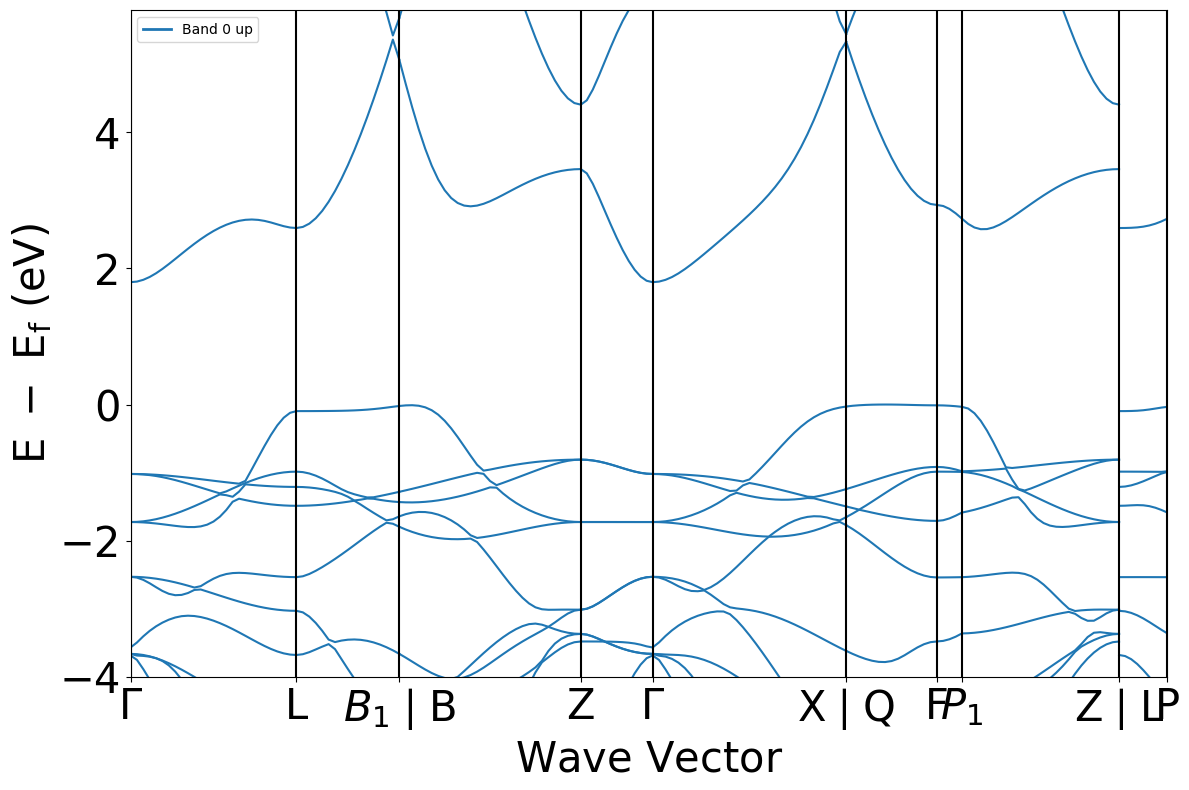

In [ ]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSPlotter

plotter = BSPlotter(bs)
plotter.get_plot()

We plot the Brillouin zone with the path which was used for the band structure

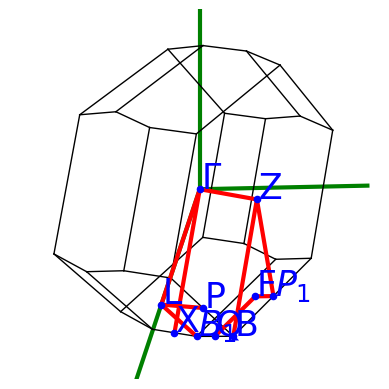

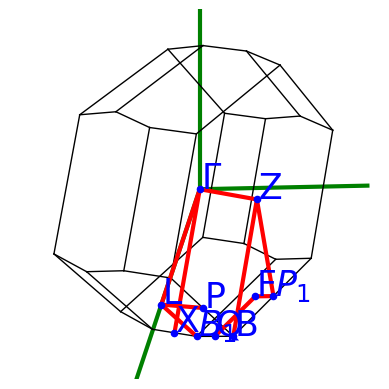

In [ ]:
plotter.plot_brillouin()